# breast-cancer-wisconsin.data


Este conjunto de dados de câncer de mama é o conjunto de dados de classificação mais popular. Que é ter 10 recursos e 1 classe de destino.

Recursos do conjunto de dados de câncer de mama:

- Número do código da amostra:
número de identidade
- Espessura do aglomerado:
Os valores estão no intervalo de 1 a 10
- Uniformidade do Tamanho da Célula:
Os valores estão no intervalo de 1 a 10
- Uniformidade da Forma da Célula:
Os valores estão no intervalo de 1 a 10
- Adesão Marginal:
Os valores estão no intervalo de 1 a 10
- Tamanho da célula epitelial única:
Os valores estão no intervalo de 1 a 10
- Núcleos nus:
Os valores estão no intervalo de 1 a 10
- Cromatina suave:
Os valores estão no intervalo de 1 a 10
- Nucléolos normais:
Os valores estão no intervalo de 1 a 10
- Mitoses:
Os valores estão no intervalo de 1 a 10
- Target do conjunto de dados de câncer de mama:

A classe de destino com duas classes de destino
- Bening
  - O valor será 2
- Maligno
  - O valor será 4

Este conjunto de dados também possui valores ausentes. Na seção de codificação deste artigo, vamos lidar com os valores ausentes antes de modelarmos o algoritmo de floresta aleatória.

In [1]:
col_names = ['Id', 'Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion', 
             'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv('/content/drive/MyDrive/colab/breast_cancer.txt', header=None)

In [5]:
df.columns = col_names

In [6]:
df.head()

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [7]:
# 2: benigno
# 4: maligno 

df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

In [8]:
df

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [9]:
df.drop('Id', axis=1, inplace=True)

In [10]:
df

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


In [11]:
df.isnull().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump_thickness              699 non-null    int64 
 1   Uniformity_Cell_Size         699 non-null    int64 
 2   Uniformity_Cell_Shape        699 non-null    int64 
 3   Marginal_Adhesion            699 non-null    int64 
 4   Single_Epithelial_Cell_Size  699 non-null    int64 
 5   Bare_Nuclei                  699 non-null    object
 6   Bland_Chromatin              699 non-null    int64 
 7   Normal_Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [13]:
df['Bare_Nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare_Nuclei, dtype: int64

In [14]:
df['Bare_Nuclei'].replace('?', np.nan, inplace=True)

In [16]:
df['Bare_Nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare_Nuclei, dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump_thickness              699 non-null    int64 
 1   Uniformity_Cell_Size         699 non-null    int64 
 2   Uniformity_Cell_Shape        699 non-null    int64 
 3   Marginal_Adhesion            699 non-null    int64 
 4   Single_Epithelial_Cell_Size  699 non-null    int64 
 5   Bare_Nuclei                  683 non-null    object
 6   Bland_Chromatin              699 non-null    int64 
 7   Normal_Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [18]:
df['Bare_Nuclei'].mode()

0    1
dtype: object

In [20]:
df['Bare_Nuclei'].fillna(df['Bare_Nuclei'].mode(), inplace=True)

In [39]:
df['Bare_Nuclei'] = pd.to_numeric(df['Bare_Nuclei'], errors='coerce')

In [40]:
df['Bare_Nuclei']

0       1.0
1      10.0
2       2.0
3       4.0
4       1.0
       ... 
694     2.0
695     1.0
696     3.0
697     4.0
698     5.0
Name: Bare_Nuclei, Length: 699, dtype: float64

In [22]:
df['Bare_Nuclei'].fillna(df['Bare_Nuclei'].median(), inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump_thickness              699 non-null    int64 
 1   Uniformity_Cell_Size         699 non-null    int64 
 2   Uniformity_Cell_Shape        699 non-null    int64 
 3   Marginal_Adhesion            699 non-null    int64 
 4   Single_Epithelial_Cell_Size  699 non-null    int64 
 5   Bare_Nuclei                  699 non-null    object
 6   Bland_Chromatin              699 non-null    int64 
 7   Normal_Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [27]:
df['Bare_Nuclei'] = df['Bare_Nuclei'].astype('int')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump_thickness              699 non-null    int64
 1   Uniformity_Cell_Size         699 non-null    int64
 2   Uniformity_Cell_Shape        699 non-null    int64
 3   Marginal_Adhesion            699 non-null    int64
 4   Single_Epithelial_Cell_Size  699 non-null    int64
 5   Bare_Nuclei                  699 non-null    int64
 6   Bland_Chromatin              699 non-null    int64
 7   Normal_Nucleoli              699 non-null    int64
 8   Mitoses                      699 non-null    int64
 9   Class                        699 non-null    int64
dtypes: int64(10)
memory usage: 54.7 KB


In [29]:
df.describe()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.486409,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.621929,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [33]:
df['Class'].value_counts(normalize=True)

2    0.655222
4    0.344778
Name: Class, dtype: float64

In [34]:
df.corr()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
Clump_thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
Uniformity_Cell_Size,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
Uniformity_Cell_Shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
Marginal_Adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
Single_Epithelial_Cell_Size,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
Bare_Nuclei,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
Bland_Chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
Normal_Nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
Mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170
Class,0.716001,0.817904,0.818934,0.696800,0.682785,0.818968,0.756616,0.712244,0.423170,1.000000


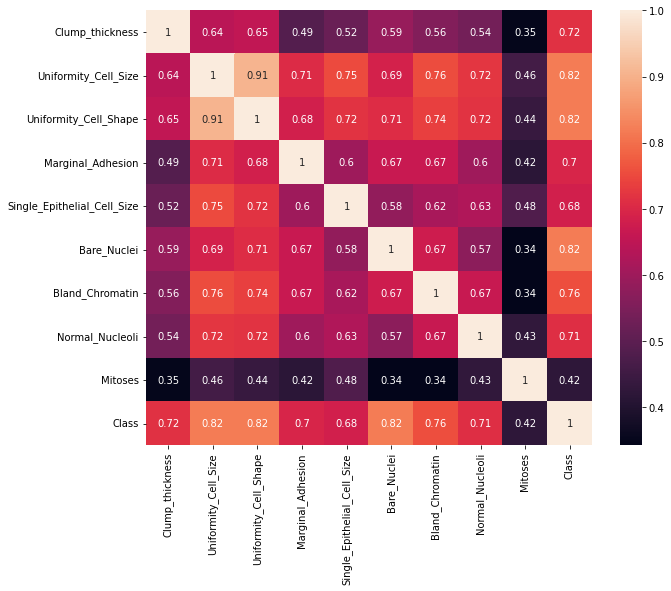

In [36]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

## Classificação

In [37]:
df.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [38]:
X = df.drop(['Class'], axis=1)
Y = df['Class']

In [39]:
X.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [40]:
Y.head()

0    2
1    2
2    2
3    2
4    2
Name: Class, dtype: int64

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler = StandardScaler()

In [45]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
knn = KNeighborsClassifier(n_neighbors=3)

In [48]:
knn.fit(X_train_scaled, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [49]:
yHat = knn.predict(X_test_scaled)

In [50]:
yHat

array([2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 4,
       2, 4, 2, 2, 4, 4, 2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2,
       2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 4, 4, 4, 2, 2,
       4, 2, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4,
       2, 2, 4, 2, 2, 4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2,
       4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 4, 2,
       2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 4, 2, 2, 4, 2, 4, 4,
       2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2,
       2, 4, 2, 4, 4, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4,
       2, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2, 2])

In [51]:
from sklearn.metrics import accuracy_score

In [57]:
def metricas(real, pred):
  print('Acurácia: ', accuracy_score(real, pred))

In [58]:
metricas(Y_test, yHat)

Acurácia:  0.9428571428571428


In [53]:
yHat_train = knn.predict(X_train_scaled)

In [59]:
metricas(Y_train, yHat_train)

Acurácia:  0.9897750511247444


In [72]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, Y_train)
yHat = knn.predict(X_test_scaled)

In [73]:
metricas(Y_test, yHat)

Acurácia:  0.9428571428571428


In [74]:
from sklearn.metrics import confusion_matrix

In [76]:
cfm = confusion_matrix(Y_test, yHat)

Text(0.5, 15.0, 'Predicted')

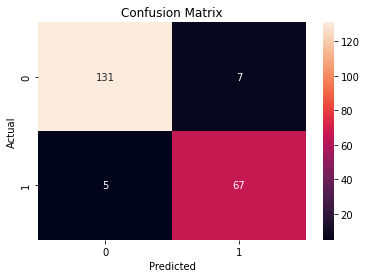

In [79]:
sns.heatmap(pd.DataFrame(cfm), annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

# 4 -> 1
# 2 -> 0

In [80]:
cfm

array([[131,   7],
       [  5,  67]])

In [86]:
TP = cfm[1,1]
TN = cfm[0,0]
FP = cfm[0,1]
FN = cfm[1,0]

In [87]:
accuracy = (TP + TN) / (TP + TN + FP + FN) 
accuracy

0.9428571428571428

In [88]:
precision = TP / (TP + FP)
precision

0.9054054054054054

In [89]:
sensibilidade = TP / (TP + FN)
sensibilidade 

0.9305555555555556

In [90]:
especificidade = TN / (TN + FP)
especificidade

0.9492753623188406

In [91]:
f1 = (2* precision * sensibilidade) / (precision + sensibilidade)
f1

0.9178082191780821

In [92]:
error = (FP + FN) /  (TP + TN + FP + FN) 
error

0.05714285714285714

In [93]:
from sklearn.metrics import classification_report

In [94]:
print(classification_report(Y_test, yHat))

              precision    recall  f1-score   support

           2       0.96      0.95      0.96       138
           4       0.91      0.93      0.92        72

    accuracy                           0.94       210
   macro avg       0.93      0.94      0.94       210
weighted avg       0.94      0.94      0.94       210



In [95]:
yHat_prob = knn.predict_proba(X_test_scaled)[:10]

In [96]:
yHat_prob

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ]])

In [97]:
from sklearn.metrics import roc_curve

In [100]:
fpr, tpr, thresh = roc_curve(Y_test, yHat, pos_label=4)

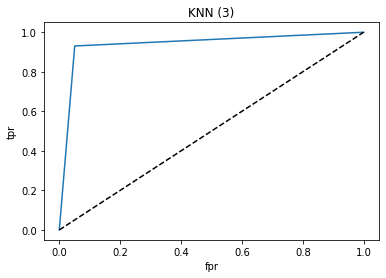

In [106]:
plt.plot(fpr, tpr, label='knn')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('KNN (3)')
plt.show()

In [107]:
from sklearn.metrics import roc_auc_score

In [108]:
roc_auc = roc_auc_score(Y_test, yHat)

In [109]:
print('AUC: ', roc_auc)

AUC:  0.9399154589371981
